## Data Exploration - Crime Data Analysis

#### Objective: Analyze the data and draw conclusions on the distribution and nature of crime in Montreal City. In your analysis, include maps that visualize the location of different incidents globally and in relation to police districts.

Read: problemStatement.txt for more info

In [ ]:
%pip install requests

In [19]:
import json
import pandas as pd
import geopandas as gpd
import requests 
import time


In [20]:
# Defiend root directory
base_url = '/Users/admin/Documents/VS Code Learning/DataExplorationProjects/'
nominatim_reverse_api = 'https://nominatim.openstreetmap.org/reverse?'

In [21]:
# Reading CSV followed by csv data analysis
criminal_data = pd.read_csv(f'{base_url}CrimeDataExploration/raw_data/actes-criminels.csv')

In [22]:
criminal_data.sample(n=10, random_state=20)

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
133213,Vol dans / sur véhicule à moteur,2018-11-06,jour,24.0,294538.639004,5.042091e+06,-73.631346,45.518660
91976,Vol de véhicule à moteur,2015-05-30,jour,35.0,296520.577991,5.043591e+06,-73.606003,45.532186
229256,Vol dans / sur véhicule à moteur,2022-06-03,jour,3.0,284136.072606,5.040642e+06,-73.764438,45.505396
201311,Méfait,2022-01-07,soir,50.0,300138.013991,5.041638e+06,-73.559670,45.514642
13040,Vol dans / sur véhicule à moteur,2015-03-13,soir,38.0,298289.612008,5.041820e+06,-73.583330,45.516265
235240,Introduction,2022-10-09,jour,31.0,295079.426990,5.044271e+06,-73.624468,45.538284
51273,Méfait,2017-03-31,jour,22.0,NaN,NaN,NaN,NaN
83268,Vol dans / sur véhicule à moteur,2015-11-28,jour,23.0,301734.584996,5.045536e+06,-73.539259,45.549726
185794,Vols qualifiés,2021-06-13,soir,33.0,295284.474000,5.043436e+06,-73.621826,45.530780
147743,Vol de véhicule à moteur,2020-03-07,soir,5.0,NaN,NaN,NaN,NaN


In [23]:
# header update in readable format
header_rename_dict = {
                        'CATEGORIE': 'category'
                        , 'DATE': 'event_date'
                        , 'QUART': 'event_time'
                        , 'PDQ': 'precinct_number'
                        , 'X':'spatial_x_coordinate'
                        , 'Y': 'spatial_y_coordinate'
                        }
criminal_data = criminal_data.rename(columns=header_rename_dict)

In [24]:
criminal_data['category'].unique()

array(['Vol de véhicule à moteur', 'Méfait', 'Vols qualifiés',
       'Vol dans / sur véhicule à moteur', 'Introduction',
       'Infractions entrainant la mort'], dtype=object)

In [25]:
# data cleaning category and converting in english understandable

replacement_dict = {'Introduction': 'Breaking In'
                    , 'Vol dans / sur véhicule à moteur': 'Theft From Motor Vehicle'
                    , 'Vol de véhicule à moteur': 'Theft Of A Motor Vehicle'
                    , 'Méfait': 'Mischief'
                    , 'Vol qualifié': 'Robbery'
                    , 'Infraction entraînant la mort': 'Murder Resulting In Death'
                    }

# Replace values in the 'category' column
criminal_data['category'] = criminal_data['category'].replace(replacement_dict)

In [26]:
criminal_data['event_time'].unique()

array(['jour', 'nuit', 'soir'], dtype=object)

In [27]:
# cleaning event_type column values
event_type_replacement_dictionary = { 'jour': 'day'
                                     , 'nuit': 'evening'
                                     , 'soir': 'night'
                                     }
                                     
criminal_data['event_time'] = criminal_data['event_time'].replace(event_type_replacement_dictionary)

In [28]:
print(criminal_data)

                        category  event_date event_time  precinct_number  \
0       Theft Of A Motor Vehicle  2018-09-13        day             30.0   
1       Theft Of A Motor Vehicle  2018-04-30        day             30.0   
2       Theft Of A Motor Vehicle  2018-09-01    evening              7.0   
3                       Mischief  2017-07-21        day             21.0   
4                       Mischief  2017-07-29        day             12.0   
...                          ...         ...        ...              ...   
244112               Breaking In  2022-09-30        day             20.0   
244113  Theft Of A Motor Vehicle  2022-09-30        day              9.0   
244114                  Mischief  2022-09-30      night             20.0   
244115  Theft From Motor Vehicle  2022-10-01      night             26.0   
244116  Theft From Motor Vehicle  2022-10-01      night             15.0   

        spatial_x_coordinate  spatial_y_coordinate  LONGITUDE   LATITUDE  
0           

In [29]:
criminal_data.shape

(244117, 8)

In [30]:
criminal_data.describe()

,precinct_number,spatial_x_coordinate,spatial_y_coordinate,LONGITUDE,LATITUDE
count,244112.000000,202724.000000,2.027240e+05,202724.000000,202724.000000
mean,26.316326,295794.169512,5.043228e+06,-73.615261,45.528880
std,14.029086,6085.984796,6.070386e+03,0.077824,0.054674
min,1.000000,268109.610010,5.029291e+06,-73.968954,45.402691
25%,15.000000,293900.976994,5.039088e+06,-73.639550,45.491676
50%,26.000000,297338.250001,5.042878e+06,-73.595557,45.525735
75%,39.000000,299665.903993,5.047188e+06,-73.565752,45.564528
max,55.000000,306389.863000,5.062496e+06,-73.479583,45.702351


In [31]:
criminal_data.head()

,category,event_date,event_time,precinct_number,spatial_x_coordinate,spatial_y_coordinate,LONGITUDE,LATITUDE
0,Theft Of A Motor Vehicle,2018-09-13,day,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Theft Of A Motor Vehicle,2018-04-30,day,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Theft Of A Motor Vehicle,2018-09-01,evening,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Mischief,2017-07-21,day,21.0,NaN,NaN,NaN,NaN
4,Mischief,2017-07-29,day,12.0,NaN,NaN,NaN,NaN


In [32]:
criminal_data.columns

Index(['category', 'event_date', 'event_time', 'precinct_number',
       'spatial_x_coordinate', 'spatial_y_coordinate', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [33]:
criminal_data.dtypes

category                 object
event_date               object
event_time               object
precinct_number         float64
spatial_x_coordinate    float64
spatial_y_coordinate    float64
LONGITUDE               float64
LATITUDE                float64
dtype: object

In [34]:
# criminal_data.describe().T

In [35]:

# Example Nominatim reverse geocoding API
nominatim_reverse_api = "https://nominatim.openstreetmap.org/reverse"

# Headers with a user-agent to avoid being blocked

def get_location_info(lat, lon):
    params = {
        'lat': lat,
        'lon': lon,
        'format': 'json'
    }
    
    headers = {
    'User-Agent': 'Mozilla/5.0 (compatible; YourApp/1.0; +http://google.com)'
    }
    response = requests.get(nominatim_reverse_api, params=params, headers=headers)
    
    if response.status_code == 200:
        result = response.json()
        # Extract the required fields if available, otherwise return None
        return {
            'place_id': result.get('place_id'),
            'class': result.get('class'),
            'type': result.get('type'),
            'place_rank': result.get('place_rank'),
            'addresstype': result.get('addresstype'),
            'name': result.get('name'),
            'display_name': result.get('display_name')
        }
    else:
        print(f"Error: {response.status_code} for lat: {lat}, lon: {lon}")
        return None

# Apply the function to each row in the DataFrame and create new columns
for index, row in criminal_data.iterrows():
    lat, lon = row['LATITUDE'], row['LONGITUDE']
    
    # Get location info from API
    location_info = get_location_info(lat, lon)
    
    # If location info was successfully retrieved, add it to the DataFrame
    if location_info:
        for key, value in location_info.items():
            criminal_data.loc[index, key] = value

    # To avoid overwhelming the API, it's good practice to pause briefly between requests
    time.sleep(1)  # Add a delay of 1 second between API calls

# Display updated DataFrame with new columns
print(criminal_data)

In [30]:
# Reading geojson data followed by its analysis
gdf = gpd.read_file(f'{base_url}CrimeDataExploration/raw_data/limitespdq.geojson')

In [84]:
# header update in readable format
header_rename_dict = {
                        'PDQ': 'precinct_number'
                        , 'NOM_PDQ':'precinct_name'
                        , 'geometry': 'precinct_location'
                        }
gdf = gdf.rename(columns=header_rename_dict)

In [85]:
gdf.head()

,precinct_number,precinct_name,precinct_location
0,1,PDQ-1,"MULTIPOLYGON (((-73.8405 45.4569, -73.8422 45...."
1,3,PDQ-3,"MULTIPOLYGON (((-73.9397 45.4701, -73.9398 45...."
2,4,PDQ-4,"MULTIPOLYGON (((-73.8159 45.5026, -73.8158 45...."
3,5,PDQ-5,"MULTIPOLYGON (((-73.7228 45.432, -73.7227 45.4..."
4,7,PDQ-7,"MULTIPOLYGON (((-73.6724 45.5325, -73.6715 45...."


<Axes: >

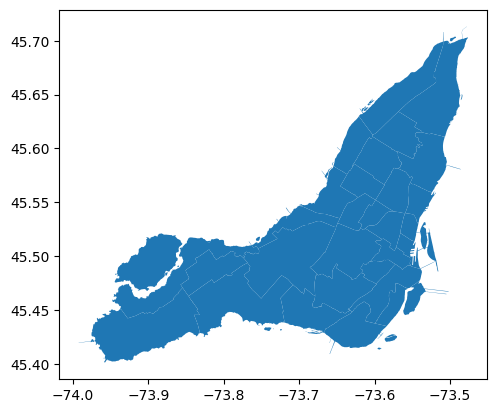

In [33]:
gdf.plot()